Daily Exchange Rates per Euro 1999-2021

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore',category=DeprecationWarning)

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from celluloid import Camera
from IPython.display import Image
%matplotlib inline

In [2]:
PATH = "E:/Medium/3 Learned/Daily Exchange Rates per Euro 1999-2021/euro-daily-hist_1999_2020.csv"
df = pd.read_csv(PATH)

In [3]:
df.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-03-26,1.5459,1.9558,6.7110,1.4814,1.1090,7.7063,NaN,26.081,7.4361,...,4.8878,89.5075,10.1905,1.5865,NaN,NaN,36.6540,9.4523,1.1782,17.6845
1,2021-03-25,1.5548,1.9558,6.6960,1.4849,1.1045,7.7220,NaN,26.233,7.4360,...,4.8865,90.0115,10.1935,1.5899,NaN,NaN,36.7460,9.4313,1.1802,17.6852
2,2021-03-24,1.5532,1.9558,6.5258,1.4884,1.1068,7.7133,NaN,26.206,7.4360,...,4.8880,90.2013,10.1635,1.5917,NaN,NaN,36.6580,9.4009,1.1825,17.5248
3,2021-03-23,1.5491,1.9558,6.5562,1.4938,1.1066,7.7367,NaN,26.198,7.4360,...,4.8893,90.2781,10.1813,1.5955,NaN,NaN,36.8190,9.3638,1.1883,17.5818
4,2021-03-22,1.5400,1.9558,6.5917,1.4903,1.1023,7.7582,NaN,26.075,7.4360,...,4.8862,88.9011,10.1580,1.5992,NaN,NaN,36.8160,9.4097,1.1926,17.5657


In [4]:
# Understanding of our columns and their dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5754 entries, 0 to 5753
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5754 non-null   object 
 1   [Australian dollar ]      5754 non-null   object 
 2   [Bulgarian lev ]          5352 non-null   object 
 3   [Brazilian real ]         5486 non-null   object 
 4   [Canadian dollar ]        5754 non-null   object 
 5   [Swiss franc ]            5754 non-null   object 
 6   [Chinese yuan renminbi ]  5486 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5754 non-null   object 
 9   [Danish krone ]           5754 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5754 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5754 non-null   object 
 14  [Croatia

Clean

    We rename the [US dollar ] and Period\Unit: columns to something easier to type — us_dollar and time.
    We change the time column to a datetime data type.
    We sort the values by time in ascending order.
    We reset the index (and drop the initial index).
    Isolate time & us_dollar in a separate df since this is our area of focus.
    Drop rows with us_dollar value = -
    Convert the us_dollar column to a float data type.


Columns renaming

In [5]:
df.rename(columns={'[US dollar ]':'us_dollar', 'Period\\Unit:':'time'}, inplace=True)

# Test
df[['time','us_dollar']].sample()

,time,us_dollar
576,2018-12-21,1.1414


Change the time column to a datetime data type

In [6]:
df['time'] = pd.to_datetime(df.time)

# Test
df.time.dtype

dtype('<M8[ns]')

Sort the values by time in ascending order & reset index.

In [7]:
df = df.sort_values('time').reset_index(drop=True)

# Test
df.head()

,time,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],us_dollar,[South African rand ]
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


Isolate time & us_dollar in a separate df

In [8]:
usd_df = df[['time','us_dollar']].copy()

# Test
usd_df.sample()

,time,us_dollar
120,1999-06-21,1.0339


In [9]:
usd_df.us_dollar.value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1218     6
          ..
1.2781     1
1.2775     1
1.2919     1
1.2709     1
1.1891     1
Name: us_dollar, Length: 3543, dtype: int64

Drop rows with us_dollar value = -

In [10]:
usd_df.drop(index=usd_df[usd_df['us_dollar']=='-'].index, inplace=True)

# Test
usd_df.us_dollar.value_counts()

1.2276    9
1.1215    8
1.1305    7
1.1797    6
1.2713    6
         ..
1.2602    1
1.2542    1
1.2525    1
1.2747    1
1.1891    1
Name: us_dollar, Length: 3542, dtype: int64

Convert the us_dollar column to a float data type.

In [11]:
usd_df.us_dollar = usd_df.us_dollar.astype('float')

# Test
usd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5692 entries, 0 to 5753
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   time       5692 non-null   datetime64[ns]
 1   us_dollar  5692 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 133.4 KB


we're finished cleaning the data, we'll generate a line plot to visualize the evolution of the euro-dollar exchange rate.

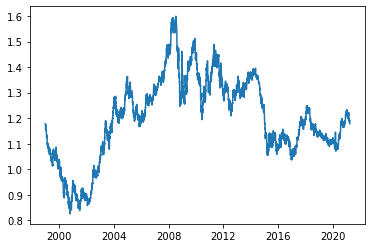

In [12]:
fig, ax = plt.subplots()
ax.plot(usd_df.time, usd_df.us_dollar)

The resulting figure has many wiggles representing the daily variation of the exchange rate. However, we are only interested in long term variation so next we are going to apply rolling mean with rolling window of 30 days showing variation of exchange rate every 30 days.

In [13]:
usd_df['rolling_mean_30'] = usd_df.us_dollar.rolling(30).mean()

# Test
usd_df.tail()

,time,us_dollar,rolling_mean_30
5749,2021-03-22,1.1926,1.203153
5750,2021-03-23,1.1883,1.202417
5751,2021-03-24,1.1825,1.201410
5752,2021-03-25,1.1802,1.200260
5753,2021-03-26,1.1782,1.199173


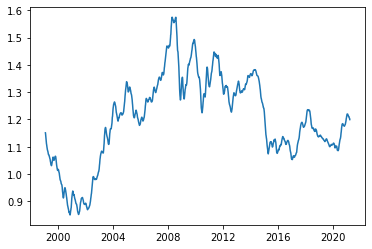

In [14]:
# Replot vs rolling mean
fig, ax = plt.subplots()
ax.plot(usd_df.time, usd_df.rolling_mean_30)

Producing our story

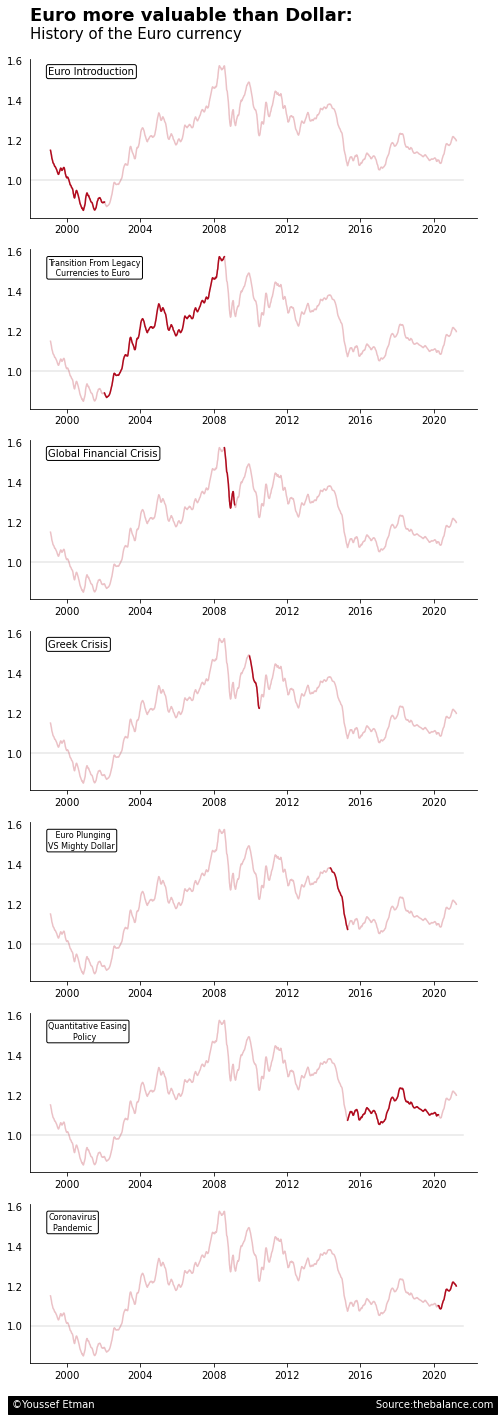

In [15]:
# Generating figure
fig , axs = plt.subplots(7,1,figsize=(8,24))

# Initializing our figures parameters
starts=[0, 782, 2455, 2807, 3935, 4175, 5440]
ends =[782, 2455, 2600, 2940, 4175, 5440, -1]
wys = [1.53, 1.48, 1.53, 1.53, 1.48, 1.48, 1.48]
texts = ['Euro Introduction', 'Transition From Legacy\n   Currencies to Euro', 'Global Financial Crisis',
       'Greek Crisis', '   Euro Plunging\nVS Mighty Dollar', 'Quantitative Easing\n          Policy',
       'Coronavirus\n  Pandemic']
sizes=[10, 8, 10, 10, 8, 8, 8]

# looping over figures
for start, end, wy, text, size, ax in zip(starts, ends, wys, texts, sizes, axs):
    # Background figure
    ax.plot(usd_df.time, usd_df.rolling_mean_30, color='#b00b1e', alpha=0.25)
    ax.axhline(y=1, color='#898989', alpha=0.2, xmax=0.97)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params(left=False)
    
    # Foreground figure
    ax.plot(usd_df.time[start:end], usd_df.rolling_mean_30[start:end], color='#b00b1e')
    ax.text(x=datetime.strptime('1999', '%Y'), y=wy, s=text, size=size,
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.2'))
    
# Title & subtitle
axs[0].text(x=datetime.strptime('1998', '%Y'), y=1.8, s='Euro more valuable than Dollar:', weight='bold', size=18)
axs[0].text(x=datetime.strptime('1998', '%Y'), y=1.71, s='History of the Euro currency', size=15)

# Signature
axs[6].text(x=datetime.strptime('1997', '%Y'), y=0.59, s='©Youssef Etman'+' '*90+'Source:thebalance.com',
            backgroundcolor='#000000', color='#ffffff');

The figure above is too long and might be annoying for some readers, Next we are going to generate an animated GIF that summarizes all of the above figures

In [16]:
# Initialize plot and animation camera
fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
camera = Camera(fig1)

# Looping over figures as above
for start, end, wy, text, size in zip(starts, ends, wys, texts, sizes):
    for i in range(0,5):
        # Main still figure
        ax1.plot(usd_df.time, usd_df.rolling_mean_30, color='#b00b1e')
        ax1.axhline(y=1, color='#898989', alpha=0.4, xmax=0.97)
        ax1.text(x=datetime.strptime('2007', '%Y'), y=1.02, s='Euro stronger ↑', color='#898989')
        ax1.text(x=datetime.strptime('2007', '%Y'), y=0.96, s='Dollar stronger ↓', color='#898989')
        ax1.spines['right'].set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.tick_params(left=False)
        ax1.set_ylabel('Eur / USD')
    
        ax2.plot(usd_df.time, usd_df.rolling_mean_30, color='#b00b1e', alpha=0.25)
        ax2.axhline(y=1, color='#898989', alpha=0.2, xmax=0.97)
        ax2.spines['right'].set_visible(False)
        ax2.spines['top'].set_visible(False)
        ax2.tick_params(left=False)
        
        # Title
        ax1.text(x=datetime.strptime('1998', '%Y'), y=1.65, s='History of the Euro currency', size=15)
        
        # Signature
        ax1.text(x=datetime.strptime('1997', '%Y'), y=0.7, s='©Youssef Etman'+' '*195+'Source:thebalance.com',
        backgroundcolor='#000000', color='#ffffff')

        # Dynamic figure
        ax2.plot(usd_df.time[start:end], usd_df.rolling_mean_30[start:end], color='#b00b1e')
        ax2.text(x=datetime.strptime('1999', '%Y'), y=wy, s=text, size=size, bbox=dict(facecolor='none', 
                                                                                        edgecolor='black', 
                                                                                        boxstyle='round,pad=0.2'))
        camera.snap()
    
# Compile & save animation
animation = camera.animate()
#animation.save('euro_hist.gif')

# Clear figure
plt.clf()

# Display saved GIF
Image(url='euro_hist.gif')

<Figure size 1008x288 with 0 Axes>